# Stroke Prediction

### Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### Attribute Information
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not

### Methodology
We'll be pre processing the given dataset from Kaggle in order to fit the computation. My main aim for this project was to test the difference in the predcition accuracy between three methods
1. Naive Bayes 
2. Decision Tree
3. MLP (multi layer perceptron)

In stroke medical data sets, suppose there are a 1000 data points and 900 do not have stroke and a 100 have stroke, so the model is overall biased towards predicting no stroke while training. Afetr training even if the model predicts that all the 1000 data points as "No Stroke" the total accuracy will be a whooping 90%. 
In such scenarios Confusion matrix comes to a great help.  
To understand the confusion matrix let us consider a two-class classification problem with the two outcomes being “Positive” and “Negative”. Given a data point to predict, the model’s outcome will be any one of these two.
If we plot the predicted values against the ground truth (actual) values, we get a matrix with the following representative elements:

**True Positives (TP)**: These are the data points whose actual outcomes were positive and the algorithm correctly identified it as positive.

**True Negatives (TN)**: These are the data points whose actual outcomes were negative and the algorithm correctly identified it as negative.

**False Positives (FP)**: These are the data points whose actual outcomes were negative but the algorithm incorrectly identified it as positive.

**False Negatives (FN)**: These are the data points whose actual outcomes were positive but the algorithm incorrectly identified it as negative.

![Confusion matrix](https://miro.medium.com/max/546/1*h1MBLDA6bPxNpxwgSD1xNA.png)

We'll calculate which models works the best by calculating the F1 scores of all the models and comparing them.
Before F1 score we have to know **Precision** and **Recall**  
**Precison** -In simple terms, precision means what percentage of the positive predictions made were actually correct.
![precision](https://miro.medium.com/max/444/1*_cYPzG5XV7XaWBRKB-pqWQ.png)
**Recall** -In simple terms means, what percentage of actual positive predictions were correctly classified by the classifier.
![Recall](https://miro.medium.com/max/431/1*5OA6GNFIl-_VcRbxv6sITg.png)

Now **F1 score** is calculated as 
![F1](https://miro.medium.com/max/303/1*ZMWbXzr6y1sLxJzbtAkkDQ.png)

Better the F1 score, better is the model.

### Link to the dataset is given below
[Stroke Prediction Dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset "Stroke Predcition Dataset")

## Importing all the required libraries 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

## Reading the dataset 

In [127]:
df=pd.read_csv(r'C:\Users\User1\OneDrive\Desktop\strokeproject\data.csv')

## Getting a brief look into the dataset 

In [128]:
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [129]:
print(df.shape)

(5110, 12)


## Checking for Null values in the dataset 

In [130]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Filling the Null values with the mean of their respective column 

In [131]:
df['bmi'].fillna(value=df['bmi'].mean(), inplace=True)

In [132]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Label Encoding
In order for the model to train on our dataset we need to give it numeric values instead of strings. Label Encoding gives a specific string a specific integer value


In [133]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [134]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [135]:
df['heart_disease'].unique()

array([1, 0], dtype=int64)

In [136]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [137]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [138]:
label_encoder=LabelEncoder()

In [139]:
str_data=df.select_dtypes(include=['object'])
int_data=df.select_dtypes(include=['integer','float'])

In [140]:
int_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   avg_glucose_level  5110 non-null   float64
 5   bmi                5110 non-null   float64
 6   stroke             5110 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 279.6 KB


In [141]:
str_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          5110 non-null   object
 1   ever_married    5110 non-null   object
 2   work_type       5110 non-null   object
 3   Residence_type  5110 non-null   object
 4   smoking_status  5110 non-null   object
dtypes: object(5)
memory usage: 199.7+ KB


In [142]:
features=str_data.apply(label_encoder.fit_transform)
print(features)

      gender  ever_married  work_type  Residence_type  smoking_status
0          1             1          2               1               1
1          0             1          3               0               2
2          1             1          2               0               2
3          0             1          2               1               3
4          0             1          3               0               2
...      ...           ...        ...             ...             ...
5105       0             1          2               1               2
5106       0             1          3               1               2
5107       0             1          3               0               2
5108       1             1          2               0               1
5109       0             1          0               1               0

[5110 rows x 5 columns]


In [143]:
features=features.join(int_data)
features.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,1,2,1,1,9046,67.0,0,1,228.69,36.600000,1
1,0,1,3,0,2,51676,61.0,0,0,202.21,28.893237,1
2,1,1,2,0,2,31112,80.0,0,1,105.92,32.500000,1
3,0,1,2,1,3,60182,49.0,0,0,171.23,34.400000,1
4,0,1,3,0,2,1665,79.0,1,0,174.12,24.000000,1


## Train Test split 

In [240]:
training_data, testing_data = train_test_split(features, test_size=0.3, random_state=5)

## Data Analysis before training

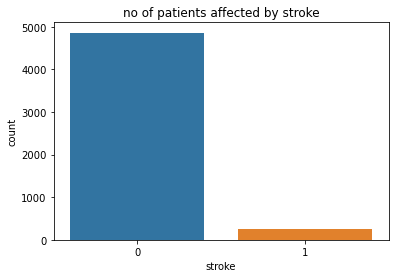

In [241]:
sns.countplot(x=df['stroke'])
plt.title("no of patients affected by stroke")
plt.show()

<AxesSubplot:xlabel='stroke', ylabel='count'>

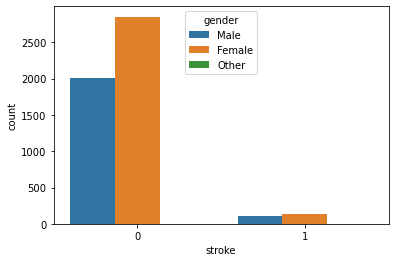

In [242]:
sns.countplot(x=df['stroke'],hue=df['gender'])

In [243]:
dff=df[df.stroke==1]

<AxesSubplot:xlabel='stroke', ylabel='Frequency'>

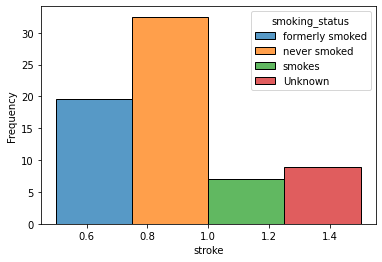

In [244]:
sns.histplot(x=dff['stroke'],hue=df['smoking_status'],stat="frequency",multiple="dodge")

In [288]:
corr_matrix=df.corr()

## Correlation matrix for all the parameters

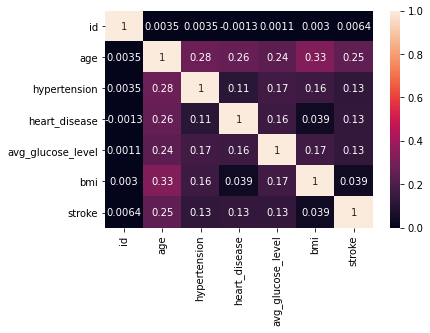

In [292]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Naive Bayes

In [245]:
model= GaussianNB()

In [246]:
y_train=training_data['stroke']
y_test=testing_data['stroke']

In [247]:
x_train=training_data.drop(['stroke'],axis=1)
x_test=testing_data.drop(['stroke'],axis=1)

In [250]:
model.fit(x_train,y_train)

GaussianNB()

In [251]:
predict=model.predict(x_test)

In [252]:
score=model.score(x_test,y_test)

In [253]:
score

0.9269406392694064

In [254]:
cv_results=cross_validate(model,x_train,y_train,cv=5)

In [255]:
cv_results

{'fit_time': array([0.00705528, 0.        , 0.00558138, 0.00734401, 0.00913239]),
 'score_time': array([0.00385857, 0.01016903, 0.00313711, 0.00103474, 0.00100589]),
 'test_score': array([0.90083799, 0.91201117, 0.92587413, 0.90909091, 0.93146853])}

In [256]:
confusion=pd.crosstab(y_test,predict)

In [257]:
confusion

col_0,0,1
stroke,,
0,1405,53
1,59,16


In [258]:
nb_report=classification_report(y_test,predict)
print(nb_report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1458
           1       0.23      0.21      0.22        75

    accuracy                           0.93      1533
   macro avg       0.60      0.59      0.59      1533
weighted avg       0.92      0.93      0.93      1533



## Decision Tree

In [259]:
dt_mod=DecisionTreeClassifier(criterion='entropy',max_depth=8)

In [260]:
dt_mod.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [261]:
y_predict=dt_mod.predict(x_test)


In [262]:
confusion=pd.crosstab(y_test,y_predict)

In [263]:
confusion

col_0,0,1
stroke,,
0,1442,16
1,71,4


In [264]:
score=dt_mod.score(x_train,y_train)
score

0.9608610567514677

In [265]:
nb_report=classification_report(y_test,y_predict)
print(nb_report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1458
           1       0.20      0.05      0.08        75

    accuracy                           0.94      1533
   macro avg       0.58      0.52      0.53      1533
weighted avg       0.92      0.94      0.93      1533



## Multi Layer Perceptron (MLP)

In [282]:
mlp_model=MLPClassifier()

In [283]:
mlp_model.fit(x_train,y_train)

MLPClassifier()

In [284]:
mlp_predict=mlp_model.predict(x_test)

In [285]:
confusion=pd.crosstab(y_test,mlp_predict)
confusion

col_0,0,1
stroke,,
0,1455,3
1,75,0


In [286]:
score=mlp_model.score(x_test,y_test)
score

0.949119373776908

In [287]:
mlp_report=classification_report(y_test,mlp_predict)
print(mlp_report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.00      0.00      0.00        75

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.90      0.95      0.93      1533



## Comparing the F1 scores of different models 

Models | F1 score
--- | --- 
Naive Bayes | 0.93
Decision Tree | 0.94
MLP | 0.95

#### Out of the three models that I used, Multi Layer Perceptron which is based on Neural Network was able the get the highest F1 score